# Thomas Cholak
# Machine Learning Project
Import Modules:

In [25]:
# Used code from: https://github.com/jacksonyuan-yt/youtube-comments-spam-classifier/blob/master/youtube-comments-spam-classifier.ipynb

import pandas as pd
import matplotlib.pyplot as plt  # matplot library

import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report

In [26]:
SpamHam = pd.read_csv('spam.csv', encoding='latin-1')

SpamHam.head()  # Loads first five entries

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
SpamHam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
SpamHam.sample(5)  # loads five random entries

,v1,v2
145,ham,Whats the staff name who is taking class for us?
2007,ham,Hi here. have birth at on the to at 8lb 7oz....
1709,ham,U meet other fren dun wan meet me ah... Muz b ...
2571,ham,Û_ and donÛ÷t worry weÛ÷ll have finished by...
4970,ham,Hey come online! Use msn... We are all there


In [28]:
SpamHam.rename(columns={'v1':'SUBJECT','v2':'TEXT'},inplace=True)  # rename columns
SpamHam2 = SpamHam.replace('Ham','1')
SpamHam3 = SpamHam2.replace('Spam','0')
data = pd.concat([SpamHam])  # string concatenation

X_train, X_test, y_train, y_test = train_test_split(data["TEXT"], data["SUBJECT"])

tfidf_vect = TfidfVectorizer(use_idf=True, lowercase=True)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(4179, 7507)

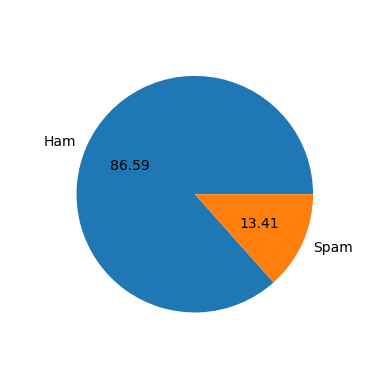

In [29]:
plt.pie(SpamHam['SUBJECT'].value_counts(), radius = 0.8, autopct="%0.2f",
        labels=['Ham','Spam'])
plt.show()

In [30]:
# Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [31]:
X_test_tfidf = tfidf_vect.transform(X_test)
predictions = model.predict(X_test_tfidf)

# Model Performance Metrics

In [32]:
confusion_matrix(y_test, predictions)

array([[1216,    0],
       [  51,  126]], dtype=int64)

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1216
        spam       1.00      0.71      0.83       177

    accuracy                           0.96      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [34]:
model.score(X_test_tfidf, y_test)

0.9633883704235463

In [35]:
SpamHam['characters'] = SpamHam['TEXT'].apply(len)
SpamHam['characters'].describe()  # outputs numbers of characters

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: characters, dtype: float64

In [36]:
with open("model.pkl", "wb") as model_file:
  pickle.dump(model, model_file)